<a href="https://colab.research.google.com/github/ashkanmosalla/Wildfire/blob/main/Wildfire_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
train = pd.read_csv('Training.csv')

In [13]:
test = pd.read_csv('Testing.csv')

In [14]:
train.head()

,OBJECTID,Fire80_Raster,X,Y,asp2,twi,tmaxjuly_2,tmax,soilmois,slope,ndvi,lulc,lake,evt_aug,elevation,road,river,pcp
0,1,1,9.778986e+05,-171014.66810,4.0,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,2.0,4.0,3.0
1,2,1,9.413986e+05,-51414.66811,5.0,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
2,3,1,9.470986e+05,-50814.66811,5.0,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
3,4,1,2.355699e+06,-50114.66811,5.0,-6.0,3.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,1.0,0.0,5.0,4.0
4,5,1,2.349199e+06,-51214.66811,3.0,143.0,3.0,5.0,3.0,3.0,5.0,4.0,5.0,4.0,1.0,0.0,5.0,4.0


In [15]:
train['Fire80_Raster'].value_counts()

Fire80_Raster
0    4768
1    4761
Name: count, dtype: int64

In [16]:
test.head()

,OBJECTID,Fire_20_Raster,X,Y,asp2,twi,tmaxjuly_2,tmax,soilmois,slope,ndvi,lulc,lake,evt_aug,elevation,road,river,pcp
0,1.0,1.0,9.444328e+05,-50060.15537,2.0,129.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
1,2.0,1.0,1.104333e+06,-41060.15537,4.0,-219.0,4.0,5.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
2,3.0,1.0,2.349833e+06,-43460.15537,2.0,143.0,3.0,5.0,3.0,4.0,5.0,4.0,5.0,5.0,1.0,0.0,5.0,4.0
3,4.0,1.0,2.360533e+06,-40860.15537,3.0,143.0,3.0,5.0,3.0,3.0,5.0,4.0,5.0,5.0,1.0,1.0,5.0,4.0
4,5.0,1.0,2.353033e+06,-47360.15537,4.0,-6.0,3.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,1.0,0.0,5.0,4.0


In [17]:
test['Fire_20_Raster'].value_counts()

Fire_20_Raster
1.0    1201
0.0    1200
Name: count, dtype: int64

In [18]:
train.shape

(9529, 18)

In [19]:
test.shape

(3707, 18)

In [20]:
train.columns

Index(['OBJECTID', 'Fire80_Raster', 'X', 'Y', 'asp2', 'twi', 'tmaxjuly_2',
       'tmax', 'soilmois', 'slope', 'ndvi', 'lulc', 'lake', 'evt_aug',
       'elevation', 'road', 'river', 'pcp'],
      dtype='object')

In [21]:
test.columns

Index(['OBJECTID', 'Fire_20_Raster', 'X', 'Y', 'asp2', 'twi', 'tmaxjuly_2',
       'tmax', 'soilmois', 'slope', 'ndvi', 'lulc', 'lake', 'evt_aug',
       'elevation', 'road', 'river', 'pcp'],
      dtype='object')

In [22]:
df_train = pd.read_csv('Training.csv', names= ['OBJECTID', 'Wildfire', 'X', 'Y', 'aspect', 'TWI', 'temp_july', 'temp_max',
                                              'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'dist_road',
                                               'dist_river', 'pcp'
                                                   ], header= 0
                      )

In [23]:
df_test = pd.read_csv('Testing.csv', names= ['OBJECTID', 'Wildfire', 'X', 'Y', 'aspect', 'TWI', 'temp_july', 'temp_max',
                                             'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'dist_road',
                                              'dist_river', 'pcp'
                                                   ], header= 0
                      )

In [26]:
df_train = df_train.astype(
    {
        'Wildfire': 'category',
        'aspect': 'category',
        'temp_july': 'category',
        'temp_max': 'category',
        'soilmois': 'category',
        'slope': 'category',
        'ndvi': 'category',
        'lulc': 'category',
        'dist_lake': 'category',
        'evt_aug': 'category',
        'elevation': 'category',
        'dist_road': 'category',
        'dist_river': 'category',
        'pcp': 'category',
    }
)

In [27]:
df_test = df_test.astype(
    {
        'Wildfire': 'category',
        'aspect': 'category',
        'temp_july': 'category',
        'temp_max': 'category',
        'soilmois': 'category',
        'slope': 'category',
        'ndvi': 'category',
        'lulc': 'category',
        'dist_lake': 'category',
        'evt_aug': 'category',
        'elevation': 'category',
        'dist_road': 'category',
        'dist_river': 'category',
        'pcp': 'category',
    }
)

In [28]:
df_train[df_train.isnull().any(axis= 1)]

,OBJECTID,Wildfire,X,Y,aspect,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp
4912,4913,0,1.067970e+06,-3.218339e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5257,5258,0,1.667470e+06,-8.523389e+04,NaN,NaN,5.0,5.0,2.0,NaN,3.0,1.0,4.0,5.0,NaN,0.0,2.0,3.0
5339,5340,0,4.469699e+05,-2.383389e+04,3.0,-219.0,NaN,5.0,3.0,4.0,4.0,4.0,1.0,5.0,3.0,0.0,3.0,2.0
5882,5883,0,2.236370e+06,2.618661e+05,NaN,NaN,5.0,5.0,3.0,NaN,5.0,4.0,5.0,5.0,NaN,1.0,5.0,4.0
6110,6111,0,2.395070e+06,3.294661e+05,NaN,NaN,4.0,5.0,4.0,NaN,4.0,11.0,5.0,5.0,NaN,1.0,5.0,4.0
6169,6170,0,2.041270e+06,3.475661e+05,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,NaN,NaN,NaN,0.0,5.0,3.0
6271,6272,0,2.443470e+06,3.548661e+05,4.0,143.0,NaN,NaN,NaN,3.0,4.0,4.0,5.0,5.0,1.0,2.0,5.0,NaN
6954,6955,0,2.942770e+06,7.680661e+05,NaN,NaN,2.0,5.0,2.0,NaN,5.0,11.0,5.0,4.0,NaN,2.0,5.0,4.0
7115,7116,0,2.861370e+06,8.542661e+05,NaN,NaN,3.0,5.0,2.0,NaN,5.0,3.0,5.0,4.0,NaN,0.0,5.0,4.0
7170,7171,0,2.829970e+06,8.940661e+05,NaN,NaN,4.0,5.0,3.0,NaN,5.0,4.0,5.0,4.0,NaN,0.0,4.0,4.0


In [29]:
df_test[df_test.isnull().any(axis= 1)]

,OBJECTID,Wildfire,X,Y,aspect,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp
1329,1330.0,0.0,1670876.864,-8.872665e+04,NaN,NaN,5.0,5.0,2.0,NaN,3.0,11.0,4.0,5.0,NaN,1.0,1.0,3.0
2368,2369.0,0.0,-1496323.136,2.653873e+06,NaN,NaN,1.0,1.0,1.0,NaN,2.0,11.0,5.0,2.0,NaN,4.0,3.0,1.0
2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
New_df_train = df_train.dropna()
New_df_test = df_test.dropna()

In [31]:
columns_to_drop = ['OBJECTID']
New_df_train = New_df_train.drop(columns= columns_to_drop)
New_df_test = New_df_test.drop(columns= columns_to_drop)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):

    vifs = [variance_inflation_factor(New_df_train.values, i) for i in range(New_df_train.shape[1])]
    tolerance = [1/vif for vif in vifs]

    vif_data = pd.DataFrame(index=New_df_train.columns)
    vif_data['VIF'] = vifs
    vif_data['Tolerance'] = tolerance

    return vif_data

# Calculate VIF
vif_data = calculate_vif(New_df_train)

print(vif_data)


                  VIF  Tolerance
Wildfire     3.677781   0.271903
X            3.276505   0.305203
Y           15.963957   0.062641
aspect       8.936499   0.111901
TWI          1.474814   0.678052
temp_july   25.104022   0.039834
temp_max    52.512773   0.019043
soilmois     9.498945   0.105275
slope       16.946471   0.059009
ndvi        19.809979   0.050480
lulc         8.281548   0.120750
dist_lake   19.014767   0.052591
evt_aug     36.170058   0.027647
elevation   19.594277   0.051035
dist_road   11.113297   0.089982
dist_river  21.056229   0.047492
pcp         18.572630   0.053843


<ipython-input-33-56db3dbb2689>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)


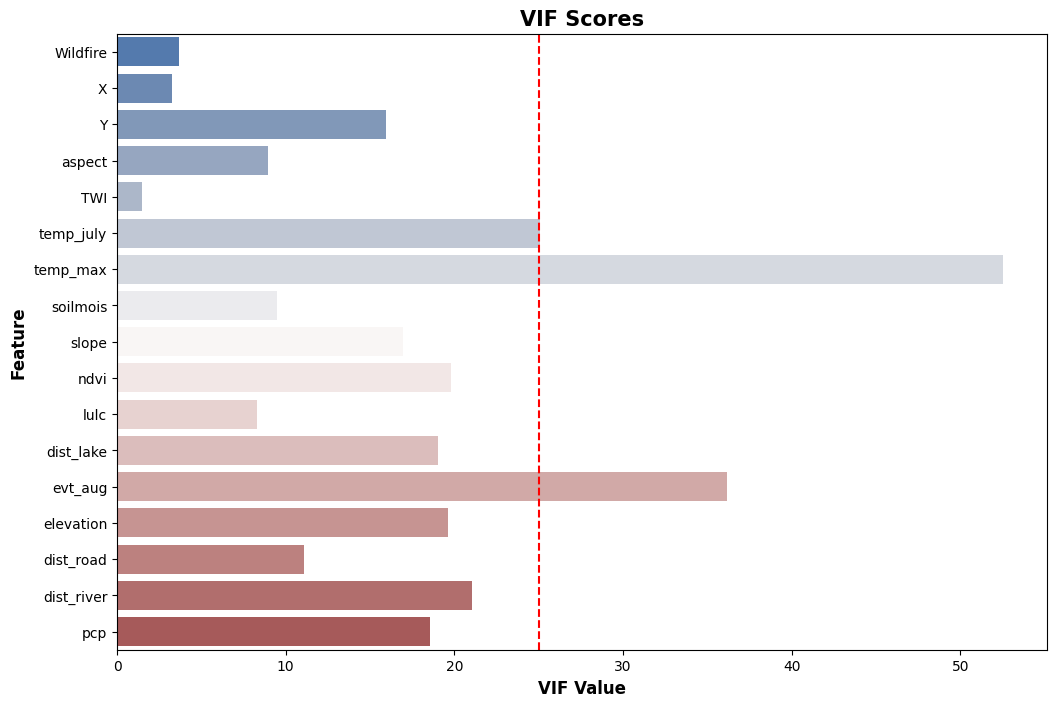

In [33]:
def plot_vif(vif_data):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8))

    # Plot the VIF values
    sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)
    ax.axvline(x=25, color="red", linestyle="--")  # Add a vertical line at VIF = 30
    ax.set_title('VIF Scores', fontweight='bold', fontsize=15)
    ax.set_xlabel('VIF Value', fontweight='bold', fontsize=12)
    ax.set_ylabel('Feature', fontweight='bold', fontsize=12)

    # Display the plot
    plt.show()

plot_vif(vif_data)

In [34]:
from sklearn.ensemble import RandomForestClassifier
# Create the feature matrix X and the target variable y

X = New_df_train[
    ['X', 'Y', 'TWI', 'temp_july', 'temp_max', 'soilmois', 'slope',
     'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'aspect', 'dist_road', 'dist_river', 'pcp']
]
y = New_df_train['Wildfire']

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Calculate the sum of importances
total_importance = feature_importance['Importance'].sum()

# Calculate the weights by dividing each importance by the total importance
feature_importance['Weight'] = feature_importance['Importance'] / total_importance

# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the feature importances with weights
print(feature_importance)


       Feature  Importance    Weight
7         ndvi    0.138632  0.138632
8         lulc    0.135557  0.135557
4     temp_max    0.129104  0.129104
10     evt_aug    0.108947  0.108947
1            Y    0.108615  0.108615
0            X    0.102106  0.102106
3    temp_july    0.063978  0.063978
13   dist_road    0.041639  0.041639
15         pcp    0.039923  0.039923
11   elevation    0.036464  0.036464
9    dist_lake    0.022041  0.022041
5     soilmois    0.020094  0.020094
6        slope    0.017475  0.017475
14  dist_river    0.015539  0.015539
12      aspect    0.011307  0.011307
2          TWI    0.008579  0.008579


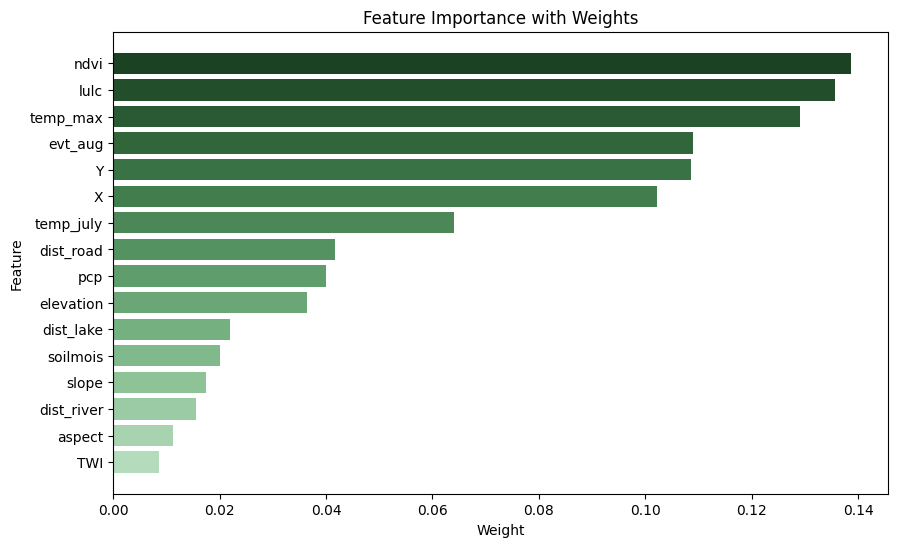

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
palette = sns.cubehelix_palette(len(feature_importance['Feature']), start=2, rot=0, dark=0.2, light=0.8, reverse=True)

# Create a graph
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Weight'], color=palette)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance with Weights')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

# Show the graph
plt.show()

In [36]:
New_df_train.shape

(9514, 17)

In [37]:
New_df_test.shape

(2399, 17)

In [38]:
New_df_train[New_df_train.isnull().any(axis= 1)]

,Wildfire,X,Y,aspect,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp


In [39]:
New_df_test[New_df_test.isnull().any(axis= 1)]

,Wildfire,X,Y,aspect,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp


# New dataframe for ML models

In [40]:
columns_to_drop = ['TWI', 'aspect', 'evt_aug', 'temp_july']
New_df_train2 = New_df_train.drop(columns = columns_to_drop)

In [41]:
New_df_train2.shape

(9514, 13)

# Encoding categorical features into suitable format

In [42]:
New_df_train2


,Wildfire,X,Y,temp_max,soilmois,slope,ndvi,lulc,dist_lake,elevation,dist_road,dist_river,pcp
0,1,9.778986e+05,-1.710147e+05,5.0,4.0,3.0,5.0,4.0,2.0,3.0,2.0,4.0,3.0
1,1,9.413986e+05,-5.141467e+04,5.0,3.0,2.0,5.0,4.0,4.0,3.0,2.0,4.0,3.0
2,1,9.470986e+05,-5.081467e+04,5.0,3.0,2.0,5.0,4.0,4.0,3.0,2.0,4.0,3.0
3,1,2.355699e+06,-5.011467e+04,5.0,3.0,2.0,5.0,4.0,5.0,1.0,0.0,5.0,4.0
4,1,2.349199e+06,-5.121467e+04,5.0,3.0,3.0,5.0,4.0,5.0,1.0,0.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9524,0,-1.600030e+06,2.807766e+06,2.0,1.0,4.0,2.0,8.0,5.0,3.0,4.0,5.0,1.0
9525,0,-1.609030e+06,2.821466e+06,2.0,1.0,5.0,2.0,8.0,5.0,4.0,4.0,5.0,1.0
9526,0,-1.606730e+06,2.816166e+06,2.0,1.0,4.0,2.0,8.0,5.0,4.0,4.0,5.0,1.0
9527,0,-1.601330e+06,2.821366e+06,1.0,1.0,5.0,2.0,8.0,5.0,3.0,4.0,5.0,1.0


In [43]:
New_df_train

,Wildfire,X,Y,aspect,TWI,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp
0,1,9.778986e+05,-1.710147e+05,4.0,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,2.0,4.0,3.0
1,1,9.413986e+05,-5.141467e+04,5.0,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
2,1,9.470986e+05,-5.081467e+04,5.0,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
3,1,2.355699e+06,-5.011467e+04,5.0,-6.0,3.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,1.0,0.0,5.0,4.0
4,1,2.349199e+06,-5.121467e+04,3.0,143.0,3.0,5.0,3.0,3.0,5.0,4.0,5.0,4.0,1.0,0.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9524,0,-1.600030e+06,2.807766e+06,4.0,143.0,1.0,2.0,1.0,4.0,2.0,8.0,5.0,1.0,3.0,4.0,5.0,1.0
9525,0,-1.609030e+06,2.821466e+06,4.0,-219.0,1.0,2.0,1.0,5.0,2.0,8.0,5.0,1.0,4.0,4.0,5.0,1.0
9526,0,-1.606730e+06,2.816166e+06,3.0,-219.0,1.0,2.0,1.0,4.0,2.0,8.0,5.0,1.0,4.0,4.0,5.0,1.0
9527,0,-1.601330e+06,2.821366e+06,2.0,-219.0,1.0,1.0,1.0,5.0,2.0,8.0,5.0,1.0,3.0,4.0,5.0,1.0


In [44]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns to be encoded
categorical_columns = [
    'temp_max', 'soilmois', 'slope', 'ndvi', 'lulc',
    'dist_lake', 'elevation', 'aspect', 'dist_road',
    'dist_river', 'pcp'
]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit the encoder and transform the training data
encoded_train = encoder.fit_transform(New_df_train[categorical_columns])
encoded_test = encoder.transform(New_df_test[categorical_columns])

# Convert the encoded features into a DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with 'X', 'Y', and 'Wildfire'
final_train_df = pd.concat([
    New_df_train[['X', 'Y', 'Wildfire']].reset_index(drop=True),
    encoded_train_df.reset_index(drop=True)
], axis=1)

final_test_df = pd.concat([
    New_df_test[['X', 'Y', 'Wildfire']].reset_index(drop=True),
    encoded_test_df.reset_index(drop=True)
], axis=1)

# Now final_train_df and final_test_df are ready for machine learning model training


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the feature matrix and target vector for training
X_train = final_train_df.drop(['Wildfire', 'X', 'Y'], axis=1)
y_train = final_train_df['Wildfire']

# Prepare the feature matrix and target vector for testing
X_test = final_test_df.drop(['Wildfire', 'X', 'Y'], axis=1)
y_test = final_test_df['Wildfire']

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = rf_model.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy:.2%}')


Random Forest accuracy: 94.66%


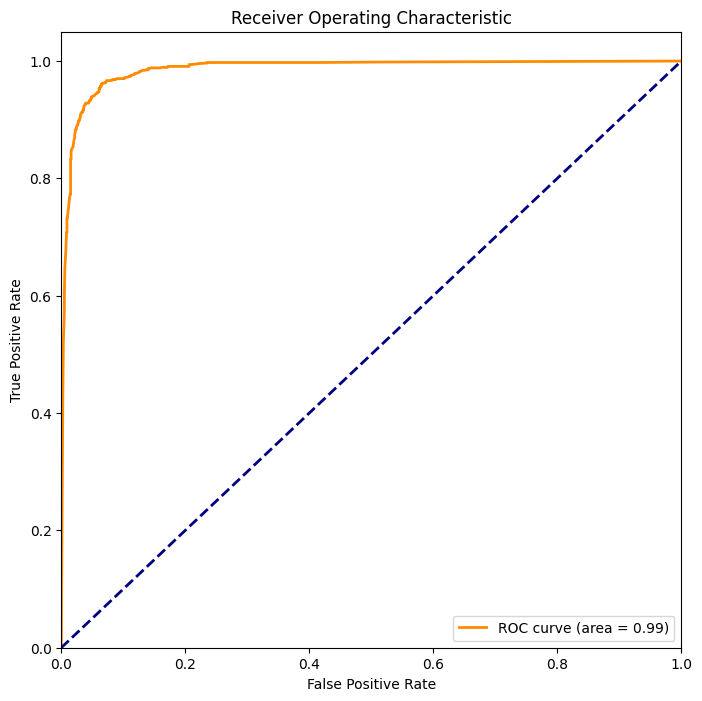

AUC: 0.99


In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = rf_model.predict_proba(X_test)[:, 1]  # We are interested in the probabilities of the positive class

# Calculate ROC curve from y_test and the probability predictions
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print(f'AUC: {roc_auc:.2f}')


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN Input Dimension
input_dim = X_train.shape[1]

# Define the ANN Model
ann_model = Sequential()
ann_model.add(Dense(128, input_dim=input_dim, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the ANN Model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN Model
ann_history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the ANN Model on Test Data
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print(f'ANN Test Accuracy: {ann_accuracy:.2f}')


Epoch 1/50
238/238 [==============================] - 2s 5ms/step - loss: 0.2922 - accuracy: 0.8852 - val_loss: 0.4720 - val_accuracy: 0.7830
Epoch 2/50
238/238 [==============================] - 1s 3ms/step - loss: 0.1942 - accuracy: 0.9280 - val_loss: 0.5031 - val_accuracy: 0.7751
Epoch 3/50
238/238 [==============================] - 1s 3ms/step - loss: 0.1681 - accuracy: 0.9358 - val_loss: 1.1630 - val_accuracy: 0.5397
Epoch 4/50
238/238 [==============================] - 1s 3ms/step - loss: 0.1505 - accuracy: 0.9417 - val_loss: 0.8534 - val_accuracy: 0.6952
Epoch 5/50
238/238 [==============================] - 1s 3ms/step - loss: 0.1320 - accuracy: 0.9501 - val_loss: 0.7843 - val_accuracy: 0.7315
Epoch 6/50
238/238 [==============================] - 1s 3ms/step - loss: 0.1211 - accuracy: 0.9536 - val_loss: 0.9661 - val_accuracy: 0.6469
Epoch 7/50
238/238 [==============================] - 1s 3ms/step - loss: 0.1048 - accuracy: 0.9587 - val_loss: 1.2269 - val_accuracy: 0.6548
Epoch 

In [51]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# CNN expects an extra dimension for channels - reshaping the data
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the CNN Model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN Model
cnn_history = cnn_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the CNN Model on Test Data
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print(f'CNN Test Accuracy: {cnn_accuracy:.2f}')


Epoch 1/30
238/238 [==============================] - 4s 10ms/step - loss: 0.3022 - accuracy: 0.8836 - val_loss: 0.4626 - val_accuracy: 0.7677
Epoch 2/30
238/238 [==============================] - 1s 6ms/step - loss: 0.2395 - accuracy: 0.9167 - val_loss: 0.7628 - val_accuracy: 0.6406
Epoch 3/30
238/238 [==============================] - 2s 10ms/step - loss: 0.2258 - accuracy: 0.9195 - val_loss: 0.5223 - val_accuracy: 0.7388
Epoch 4/30
238/238 [==============================] - 2s 10ms/step - loss: 0.2143 - accuracy: 0.9246 - val_loss: 0.5875 - val_accuracy: 0.7488
Epoch 5/30
238/238 [==============================] - 1s 6ms/step - loss: 0.2019 - accuracy: 0.9273 - val_loss: 0.3557 - val_accuracy: 0.8618
Epoch 6/30
238/238 [==============================] - 1s 6ms/step - loss: 0.1913 - accuracy: 0.9294 - val_loss: 0.4505 - val_accuracy: 0.8213
Epoch 7/30
238/238 [==============================] - 1s 6ms/step - loss: 0.1790 - accuracy: 0.9352 - val_loss: 0.5704 - val_accuracy: 0.7709
Epo

75/75 [==============================] - 0s 3ms/step


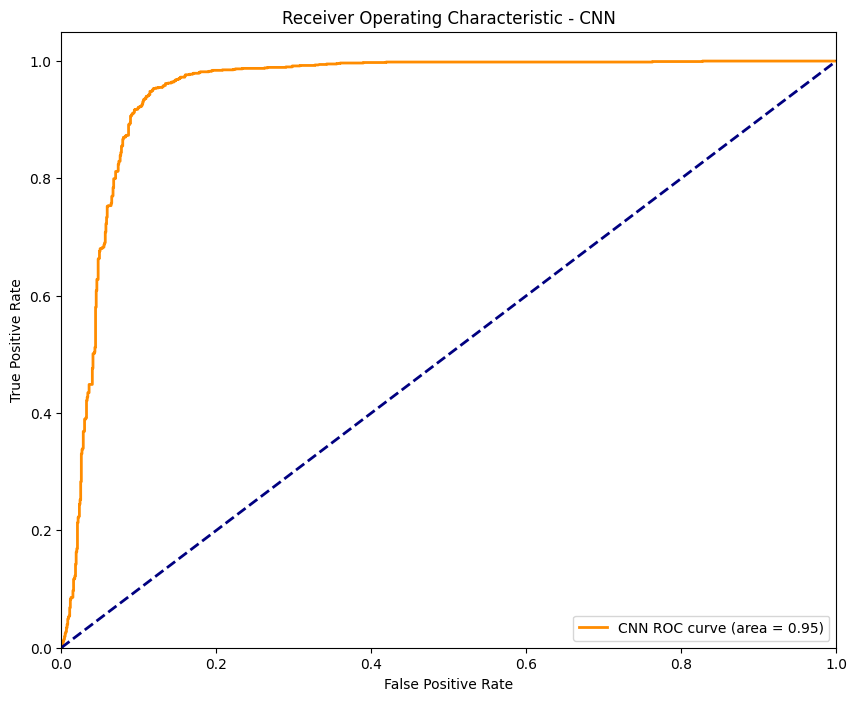

CNN AUC: 0.95


In [52]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class on test set
y_pred_probs_cnn = cnn_model.predict(X_test_reshaped).ravel()

# Compute ROC curve and ROC area
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_probs_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Plotting ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - CNN')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print(f'CNN AUC: {roc_auc_cnn:.2f}')


In [50]:
# Get the predicted probabilities for the test set
y_pred_probs = ann_model.predict(X_test)

# If you need a pandas DataFrame and the probabilities are in a 2D array (e.g., [[0.1], [0.9], ...])
# and you want a 1D array, you can flatten the array like this:
y_pred_probs = y_pred_probs.flatten()

# Now, y_pred_probs contains the probability of being in the positive class for each test sample
# You can create a DataFrame from it if you want:
probabilities_df = pd.DataFrame({
    'Probability': y_pred_probs
})

# If you want to add the probabilities to your test DataFrame with other information:
X_test_with_probabilities = X_test.copy()
X_test_with_probabilities['Probability'] = y_pred_probs

# Show the DataFrame
print(X_test_with_probabilities.head())


75/75 [==============================] - 0s 2ms/step
   temp_max_2.0  temp_max_3.0  temp_max_4.0  temp_max_5.0  soilmois_2.0  \
0           0.0           0.0           0.0           1.0           0.0   
1           0.0           0.0           0.0           1.0           0.0   
2           0.0           0.0           0.0           1.0           0.0   
3           0.0           0.0           0.0           1.0           0.0   
4           0.0           0.0           0.0           1.0           0.0   

   soilmois_3.0  soilmois_4.0  soilmois_5.0  slope_2.0  slope_3.0  ...  \
0           1.0           0.0           0.0        1.0        0.0  ...   
1           1.0           0.0           0.0        0.0        0.0  ...   
2           1.0           0.0           0.0        0.0        0.0  ...   
3           1.0           0.0           0.0        0.0        1.0  ...   
4           1.0           0.0           0.0        1.0        0.0  ...   

   dist_road_4.0  dist_river_2.0  dist_river_3.0  d